<a href="https://colab.research.google.com/github/Velagapudi112/Flipkart/blob/main/Flipkart_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Creation of Dataset**

In [49]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

In [50]:
# Generate User Profiles
def generate_user_profiles(num_users):
    user_profiles = []
    for _ in range(num_users):
        profile = {
            'user_id': _,
            'age': np.random.randint(18, 65),
            'gender': np.random.choice(['Male', 'Female']),
            'location': np.random.choice(['Vijayawada', 'Hyderabad', 'Pune', 'Banglore', 'Mumbai']),
            'interests': np.random.choice(['Electronics', 'Clothing', 'Books', 'Sports'])
        }
        user_profiles.append(profile)
    return pd.DataFrame(user_profiles)

In [51]:
# Generate Product Categories
def generate_products(num_products):
    categories = ['Electronics', 'Clothing', 'Books', 'Sports']
    products = []
    for _ in range(num_products):
        category = np.random.choice(categories)
        if category == 'Electronics':
            features = {
                'Screen Size': np.random.choice(['15 inches', '13 inches', '24 inches']),
                'Processor': np.random.choice(['Intel i7', 'AMD Ryzen 7', 'Apple M1']),
                'Camera Resolution': np.random.choice(['12 MP', '20 MP', '32 MP'])
            }
            brands = ['Sony', 'Samsung', 'Apple', 'LG']
        elif category == 'Clothing':
            features = {
                'Material': np.random.choice(['Cotton', 'Polyester', 'Denim']),
                'Size': np.random.choice(['S', 'M', 'L', 'XL']),
                'Color': np.random.choice(['Red', 'Blue', 'Black', 'White'])
            }
            brands = ['Nike', 'Adidas', 'Zara', 'H&M']
        elif category == 'Books':
            features = {
                'Author': np.random.choice(['J.K. Rowling', 'Stephen King', 'Michelle Obama']),
                'Genre': np.random.choice(['Fantasy', 'Horror', 'Biography'])
            }
            brands = ['Penguin', 'Random House', 'HarperCollins']
        else:  # 'Sports'
            features = {
                'Sport Type': np.random.choice(['Running', 'Basketball', 'Yoga']),
                'Size': np.random.choice(['Small', 'Medium', 'Large']),
                'Weight': np.random.choice(['Light', 'Medium', 'Heavy'])
            }
            brands = ['Nike', 'Adidas', 'Puma', 'Under Armour']

        product = {
            'product_id': _,
            'category': category,
            'price': round(np.random.uniform(100, 10000), 2),
            'brand': np.random.choice(brands),
            'features': features
        }
        products.append(product)
    return pd.DataFrame(products)

In [52]:
# Simulate User Interactions
def simulate_interactions(user_profiles, products, num_interactions):
    interactions = []
    for user_id in user_profiles['user_id']:
        for _ in range(num_interactions):
            product_id = np.random.randint(len(products))
            interaction_type = np.random.choice(['view', 'click', 'purchase', 'review'])
            interaction = {
                'user_id': user_id,
                'product_id': product_id,
                'interaction_type': interaction_type
            }
            interactions.append(interaction)
    return pd.DataFrame(interactions)

In [53]:
# Generate User Similarity Matrix
def calculate_user_similarity(user_profiles, interactions):
    user_matrix = pd.pivot_table(
        interactions,
        index='user_id',
        columns='product_id',
        values='interaction_type',
        aggfunc='count',
        fill_value=0
    )
    user_similarity_matrix = cosine_similarity(user_matrix)
    return user_similarity_matrix

In [54]:
# Generate the dataset
num_users = 1000
num_products = 300
num_interactions = 10

user_profiles = generate_user_profiles(num_users)
products = generate_products(num_products)
interactions = simulate_interactions(user_profiles, products, num_interactions)
user_similarity_matrix = calculate_user_similarity(user_profiles, interactions)

In [55]:
# Save Dataframes to CSV
user_profiles.to_csv('user_profiles.csv', index=False)
products.to_csv('products.csv', index=False)
interactions.to_csv('interactions.csv', index=False)
np.savetxt('user_similarity_matrix.csv', user_similarity_matrix, delimiter=',')

# **Data Understanding and Preprocessing**

In [56]:
# Load the datasets
interactions_df = pd.read_csv('interactions.csv')
products_df = pd.read_csv('products.csv')
user_profiles_df = pd.read_csv('user_profiles.csv')

In [57]:
# Explore the data
print("Interactions Data:")
print(interactions_df.head())

print("\nProducts Data:")
print(products_df.head())

print("\nUser Profiles Data:")
print(user_profiles_df.head())

Interactions Data:
   user_id  product_id interaction_type
0        0         137           review
1        0         268         purchase
2        0          43           review
3        0           9            click
4        0          50           review

Products Data:
   product_id     category    price         brand  \
0           0       Sports  4631.07  Under Armour   
1           1     Clothing  5531.18        Adidas   
2           2     Clothing   647.94          Zara   
3           3  Electronics  2123.83       Samsung   
4           4       Sports  5346.09        Adidas   

                                            features  
0  {'Sport Type': 'Basketball', 'Size': 'Small', ...  
1  {'Material': 'Polyester', 'Size': 'M', 'Color'...  
2  {'Material': 'Polyester', 'Size': 'XL', 'Color...  
3  {'Screen Size': '13 inches', 'Processor': 'Int...  
4  {'Sport Type': 'Basketball', 'Size': 'Large', ...  

User Profiles Data:
   user_id  age  gender   location interests
0        0

In [58]:
# Preprocess the data
# Handling missing values
interactions_df.dropna(inplace=True)
products_df.dropna(inplace=True)
user_profiles_df.dropna(inplace=True)

In [59]:
# Convert categorical variables to numerical representations
products_df = pd.get_dummies(products_df, columns=['category', 'brand'])

In [60]:
# Merge dataframes
# Assuming 'user_id' and 'product_id' are common columns between interactions and products/user_profiles
interactions_data = interactions_df.merge(products_df, on='product_id', how='inner')
interactions_data = interactions_data.merge(user_profiles_df, on='user_id', how='inner')

# **Feature Engineering**

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [62]:
# Encode categorical attributes in user profiles
label_encoder = LabelEncoder()
user_profiles_df['encoded_gender'] = label_encoder.fit_transform(user_profiles_df['gender'])
user_profiles_df['encoded_location'] = label_encoder.fit_transform(user_profiles_df['location'])

In [63]:
# Generate TF-IDF features for product features
product_features = products_df['features'].fillna("")  # Fill missing values with empty string
tfidf_vectorizer = TfidfVectorizer()
product_features_tfidf = tfidf_vectorizer.fit_transform(product_features)

In [64]:
# Convert TF-IDF matrix to a dense numpy array
product_features_tfidf_dense = product_features_tfidf.toarray()

In [65]:
# Create a DataFrame with the TF-IDF features and product IDs
product_features_df = pd.DataFrame(data=product_features_tfidf_dense, columns=tfidf_vectorizer.get_feature_names_out())
product_features_df['product_id'] = products_df['product_id']

In [66]:
# Merge the product features back to interactions_data
interactions_data = interactions_data.merge(product_features_df, on='product_id', how='left')

# **Data Visualisation**

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

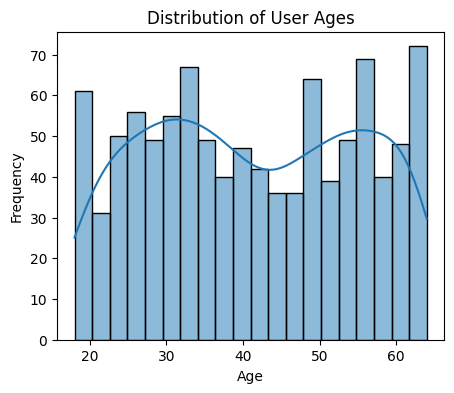

In [68]:
# Explore the distribution of user ages
plt.figure(figsize=(5, 4))
sns.histplot(data=user_profiles_df, x='age', bins=20, kde=True)
plt.title("Distribution of User Ages")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

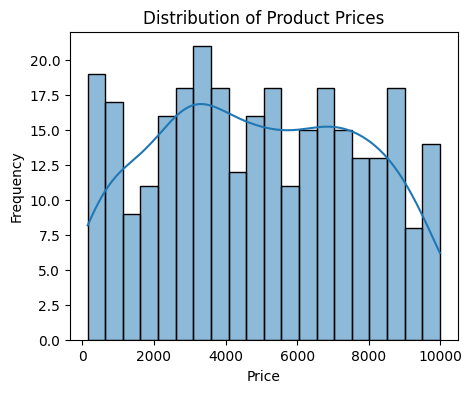

In [69]:
# Explore the distribution of product prices
plt.figure(figsize=(5, 4))
sns.histplot(data=products_df, x='price', bins=20, kde=True)
plt.title("Distribution of Product Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

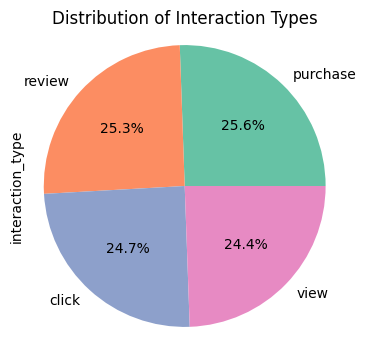

In [70]:
plt.figure(figsize=(4, 4))
interactions_df['interaction_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title("Distribution of Interaction Types")
plt.axis('equal')
plt.show()

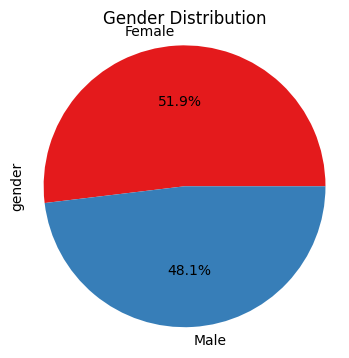

In [71]:
plt.figure(figsize=(4, 4))
user_profiles_df['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Set1'))
plt.title("Gender Distribution")
plt.axis('equal')
plt.show()

<ipython-input-72-9923edb5b8c3>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  interactions_correlation_matrix = interactions_df.corr()


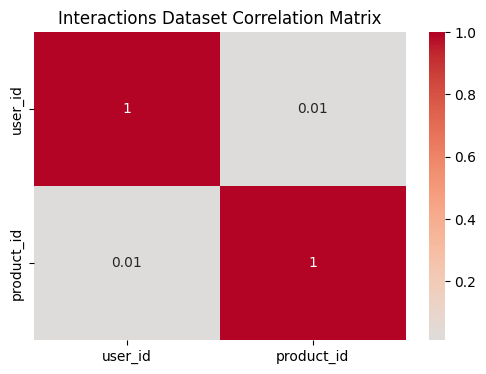

In [72]:
#Interactions Dataset Correlation Matrix
import seaborn as sns
import matplotlib.pyplot as plt
interactions_correlation_matrix = interactions_df.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(interactions_correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Interactions Dataset Correlation Matrix")
plt.show()

<ipython-input-73-53d727a7c87d>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  user_profiles_correlation_matrix = user_profiles_df.corr()


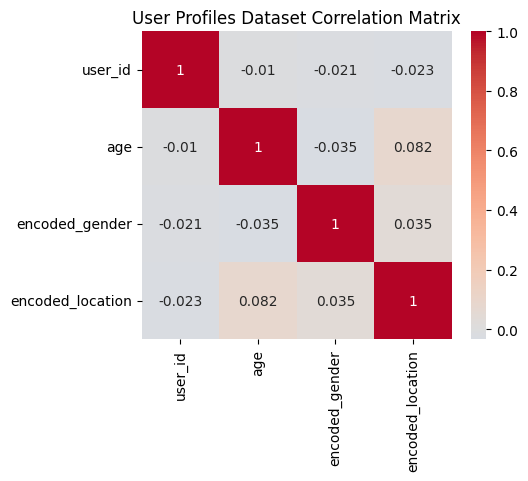

In [73]:
#User Profiles Dataset Correlation Matrix
import seaborn as sns
import matplotlib.pyplot as plt
user_profiles_correlation_matrix = user_profiles_df.corr()
plt.figure(figsize=(5, 4))
sns.heatmap(user_profiles_correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("User Profiles Dataset Correlation Matrix")
plt.show()

<ipython-input-74-a2e48055d0f5>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  products_correlation_matrix = products_df.corr()


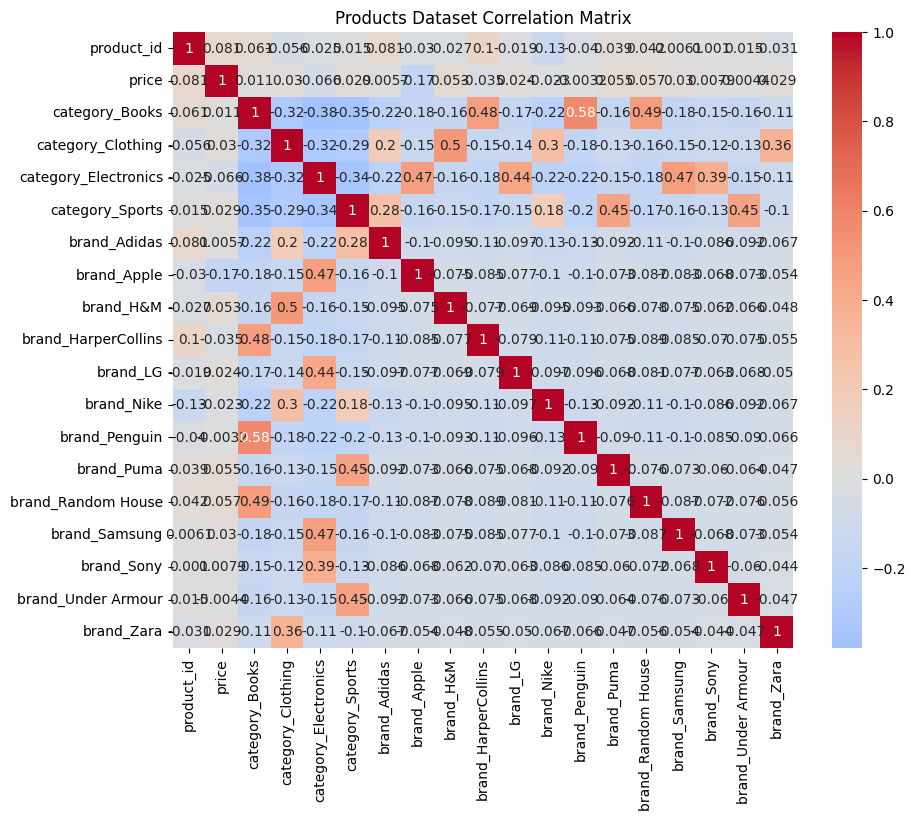

In [74]:
#Products Dataset Correlation Matrix
import seaborn as sns
import matplotlib.pyplot as plt
products_correlation_matrix = products_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(products_correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Products Dataset Correlation Matrix")
plt.show()

# **Building the Recommendation Model**

In [75]:
pip install scikit-surprise

In [76]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from surprise import Dataset, Reader, SVD
from collections import defaultdict
from surprise.model_selection import train_test_split

In [77]:
# Load and preprocess data
interactions_df = pd.read_csv('/content/interactions.csv')
products_df = pd.read_csv('/content/products.csv')
user_profiles_df = pd.read_csv('/content/user_profiles.csv')

In [78]:
# Preprocess interactions_df: Convert interaction_type to numerical
interaction_type_encoder = LabelEncoder()
interactions_df['interaction_type_encoded'] = interaction_type_encoder.fit_transform(interactions_df['interaction_type'])

In [79]:
# Collaborative Filtering
reader = Reader(rating_scale=(0, interaction_type_encoder.classes_.shape[0] - 1))
data = Dataset.load_from_df(interactions_df[['user_id', 'product_id', 'interaction_type_encoded']], reader)

In [80]:
# Manually split data into train and test sets within Surprise framework
trainset = data.build_full_trainset()
testset = trainset.build_testset()

cf_model = SVD()
cf_model.fit(trainset)

In [81]:
# Content-Based Filtering
product_features = products_df['features'].fillna("")
tfidf_vectorizer = TfidfVectorizer()
product_features_tfidf = tfidf_vectorizer.fit_transform(product_features)
item_similarity_matrix = cosine_similarity(product_features_tfidf)

In [82]:
# Hybrid Recommendations
def get_hybrid_recommendations_with_details(user_id, num_recommendations=10):
    cf_predictions = defaultdict(float)
    cb_predictions = defaultdict(float)

    for _, product_id, interaction_type in interactions_df[interactions_df['user_id'] == user_id][['product_id', 'interaction_type']].itertuples():
        if interaction_type == 'purchase':
            cf_score = cf_model.predict(user_id, product_id).est
            cf_predictions[product_id] = cf_score

            product_index = products_df[products_df['product_id'] == product_id].index[0]
            cb_score = np.mean(item_similarity_matrix[product_index])
            cb_predictions[product_id] = cb_score

    hybrid_scores = defaultdict(float)
    for product_id in set(cf_predictions.keys()).union(cb_predictions.keys()):
        hybrid_scores[product_id] = (cf_predictions[product_id] + cb_predictions[product_id]) / 2

    sorted_recommendations = sorted(hybrid_scores.items(), key=lambda x: x[1], reverse=True)[:num_recommendations]

    # Display recommendations with product details
    recommended_products = [product_id for product_id, _ in sorted_recommendations]
    recommended_product_details = products_df[products_df['product_id'].isin(recommended_products)]

    recommendations_with_details = []
    for product_id, score in sorted_recommendations:
        product_details = recommended_product_details[recommended_product_details['product_id'] == product_id]
        recommendations_with_details.append((product_id, score, product_details))

    return recommendations_with_details

In [83]:
# user input
user_id = int(input("Enter your user ID: "))
recommendations = get_hybrid_recommendations_with_details(user_id)
print("Hybrid Recommendations for User", user_id)
for product_id, score, product_details in recommendations:
    print("Product:", product_id, "Score:", score)
    print("Details:")
    print(product_details)
    print("-" * 50)

Enter your user ID: 561
Hybrid Recommendations for User 561
Product: 73 Score: 0.8041564750417137
Details:
    product_id  category    price brand  \
73          73  Clothing  5994.79  Nike   

                                             features  
73  {'Material': 'Denim', 'Size': 'XL', 'Color': '...  
--------------------------------------------------
Product: 147 Score: 0.8018378119929356
Details:
     product_id category    price         brand  \
147         147    Books  8621.84  Random House   

                                           features  
147  {'Author': 'Stephen King', 'Genre': 'Fantasy'}  
--------------------------------------------------
Product: 105 Score: 0.7286008691369771
Details:
     product_id category    price    brand  \
105         105    Books  5657.99  Penguin   

                                            features  
105  {'Author': 'Michelle Obama', 'Genre': 'Horror'}  
--------------------------------------------------
Product: 20 Score: 0.5942703666

# **Generating Personalized Rankings**

In [84]:
# Generate personalized rankings for each user
def generate_personalized_rankings(user_id):
    recommendations = get_hybrid_recommendations_with_details(user_id)
    return recommendations

In [85]:
# Generate and display personalized rankings for a specific user
user_id = int(input("Enter a user ID to generate personalized rankings: "))
personalized_rankings = generate_personalized_rankings(user_id)

if personalized_rankings:
    print("Personalized Rankings for User", user_id)
    for rank, (product_id, score, product_details) in enumerate(personalized_rankings, start=1):
        print(f"Rank {rank}:")
        print("Product:", product_id)
        print("Score:", score)
        print("Details:")
        print(product_details)
        print("-" * 50)
else:
    print("No personalized rankings found for the user.")

Enter a user ID to generate personalized rankings: 561
Personalized Rankings for User 561
Rank 1:
Product: 73
Score: 0.8041564750417137
Details:
    product_id  category    price brand  \
73          73  Clothing  5994.79  Nike   

                                             features  
73  {'Material': 'Denim', 'Size': 'XL', 'Color': '...  
--------------------------------------------------
Rank 2:
Product: 147
Score: 0.8018378119929356
Details:
     product_id category    price         brand  \
147         147    Books  8621.84  Random House   

                                           features  
147  {'Author': 'Stephen King', 'Genre': 'Fantasy'}  
--------------------------------------------------
Rank 3:
Product: 105
Score: 0.7286008691369771
Details:
     product_id category    price    brand  \
105         105    Books  5657.99  Penguin   

                                            features  
105  {'Author': 'Michelle Obama', 'Genre': 'Horror'}  
----------------------------

# **Evaluation**

In [86]:
from sklearn.metrics import average_precision_score

In [87]:
# Evaluate personalized ranking system using Mean Average Precision (MAP)
def evaluate_personalized_ranking_system():
    user_ids = interactions_df['user_id'].unique()
    all_actual_interactions = []
    all_predicted_ranks = []

    for user_id in user_ids:
        actual_interactions = interactions_df[(interactions_df['user_id'] == user_id) & (interactions_df['interaction_type'] == 'purchase')]['product_id'].tolist()
        personalized_rankings = generate_personalized_rankings(user_id)
        predicted_ranks = [rank + 1 for rank, (product_id, _, _) in enumerate(personalized_rankings) if product_id in actual_interactions]

        all_actual_interactions.append(actual_interactions)
        all_predicted_ranks.append(predicted_ranks)

    # Compute Mean Average Precision (MAP)
    map_scores = []
    for actual_ranks, predicted_ranks in zip(all_actual_interactions, all_predicted_ranks):
        average_precision = 0
        num_correct = 0
        for k, rank in enumerate(predicted_ranks, start=1):
            if rank <= len(actual_ranks):
                num_correct += 1
                average_precision += num_correct / k
        if num_correct > 0:
            map_scores.append(average_precision / len(actual_ranks))

    mean_average_precision = sum(map_scores) / len(map_scores)
    return mean_average_precision

# Evaluate and print Mean Average Precision (MAP)
map_score = evaluate_personalized_ranking_system()
print("Mean Average Precision (MAP):", map_score)

Mean Average Precision (MAP): 0.9971518987341773
